In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# grandparentdir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(currentdir)))) + '/python_utils'
grandparentdir = '/home/kss/_2022/MonteCarlo'
sys.path.insert(0, grandparentdir + '/python_utils') 

from Exact_Ising_model import *
from Draw_module_1  import *

In [53]:
alpha_crit_range_dict = {
                    "a=1"    :[1.58,1.64],
                    "a=1.5"  :[1.76,1.82],
                    "a=2"    :[1.88,1.94],
                    "a=2.5"  :[1.96,2.02],
                    "a=3"    :[2.06,2.12],
                    "a=3.5"  :[2.08,2.14],
                    "a=100"  :[2.22,2.28],
}
alpha_crit_dict = {}
alpha_file_name_dict = {
                    "a=1"    :"1.000000",
                    "a=1.5"  :"1.500000",
                    "a=2"    :"2.000000",
                    "a=2.5"  :"2.500000",
                    "a=3"    :"3.000000",
                    "a=3.5"  :"3.500000",
                    "a=100"  :"100.000000",
}
def alpha_to_number(alpha):
    # return float(alpha[3:])
    return alpha[3:]


In [17]:
parsing_dict, alpha_list = parsing_helper("./0711/")

In [18]:
alpha_list

['a=1', 'a=1.5', 'a=2', 'a=2.5', 'a=3', 'a=3.5', 'a=100']

In [19]:
parsing_dict['a=1']

[['./0711/a=1/AA_Metropolis_c_16_16_int31_mcs3000000_a1.000000_Test__1.csv',
  './0711/a=1/AA_Metropolis_c_32_32_int31_mcs3000000_a1.000000_Test__1.csv',
  './0711/a=1/AA_Metropolis_c_48_48_int31_mcs3000000_a1.000000_Test__1.csv',
  './0711/a=1/AA_Metropolis_c_64_64_int31_mcs4000000_a1.000000_Test__1.csv',
  './0711/a=1/AA_Metropolis_c_96_96_int31_mcs4000000_a1.000000_Test__1.csv'],
 [16, 32, 48, 64, 96],
 [31, 31, 31, 31, 31],
 [3000000, 3000000, 3000000, 4000000, 4000000]]

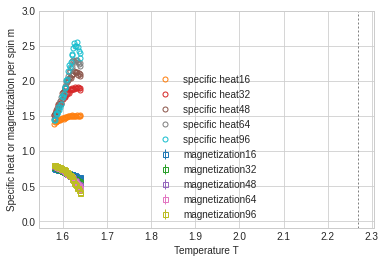

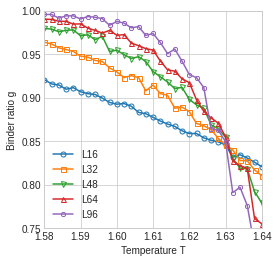

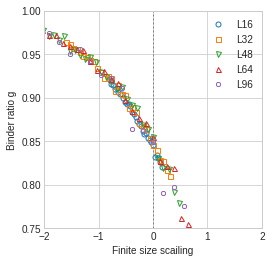

NameError: name 'alpha_crit_dict' is not defined

In [45]:
alpha = alpha_list[0]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 1.63)
alpha_crit_dict[alpha] = 1.63

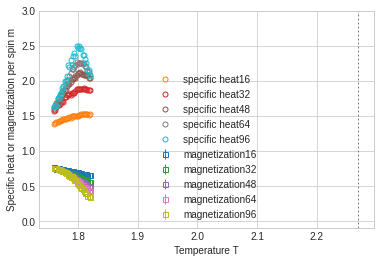

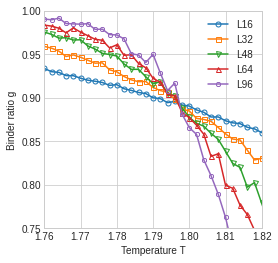

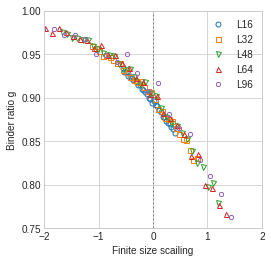

In [47]:
alpha = alpha_list[1]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 1.795)
alpha_crit_dict[alpha] = 1.795

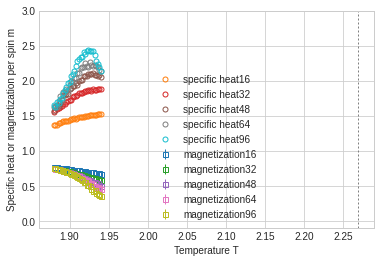

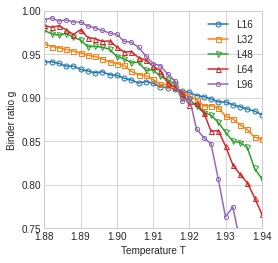

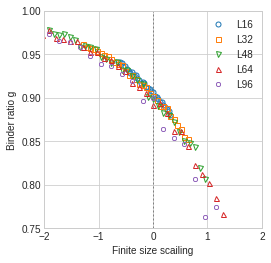

In [35]:
alpha = alpha_list[2]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 1.92)


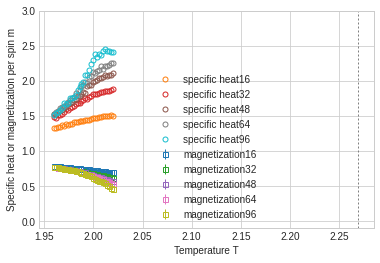

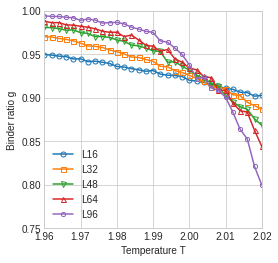

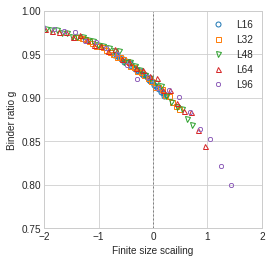

In [48]:
alpha = alpha_list[3]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.005)
alpha_crit_dict[alpha] = 2.005

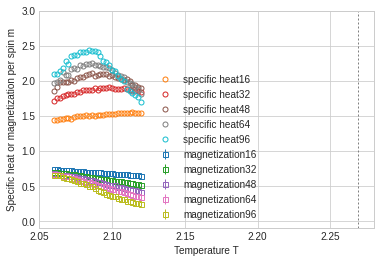

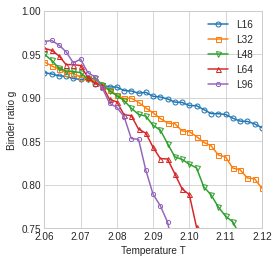

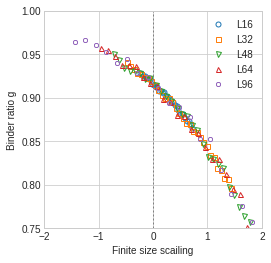

In [51]:
alpha = alpha_list[4]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.075)
alpha_crit_dict[alpha] = 2.075

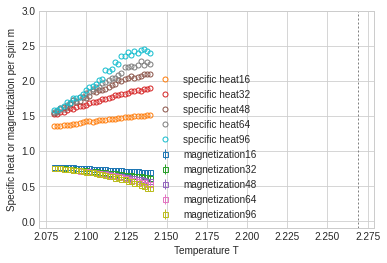

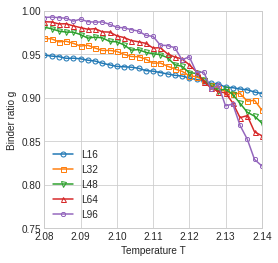

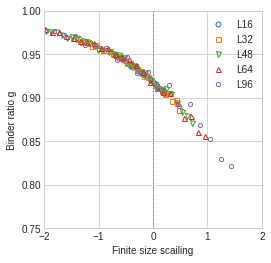

In [49]:
alpha = alpha_list[5]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.125)
alpha_crit_dict[alpha] = 2.125

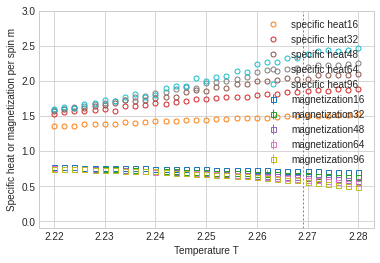

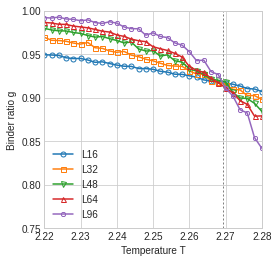

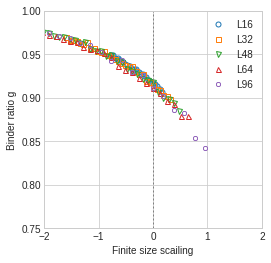

In [50]:
alpha = alpha_list[6]
draw_multi(*parsing_dict[alpha])
draw_binder_FFS(*parsing_dict[alpha],alpha_crit_range_dict[alpha], Tc = 2.27)
alpha_crit_dict[alpha] = 2.27

In [ ]:
def draw_1binder(path):
    L5 = pd.read_csv(path)
    # L5 = pd.read_csv("../C++/Result/Exact_c_5_int40_1.csv")
    Llist = [L5]
    T2 = L5.iloc[:,1].values
    Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]
    plt.style.use('seaborn-whitegrid')

    # plt.ylim(-0.1,2)
    plt.xlim(1.5,4)
    marker = ["o","s","o","s","o"]
    for i in range(1):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5)

    # plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])

    plt.show()

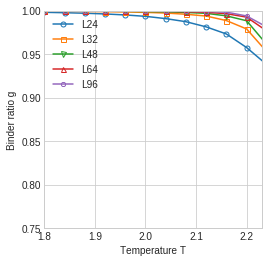

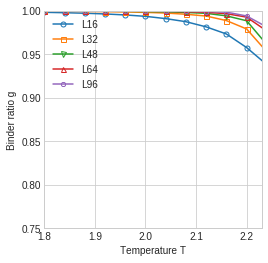

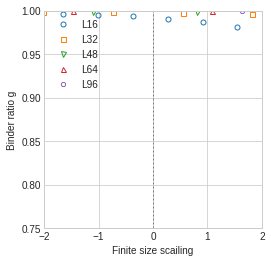

In [ ]:
Lsize = [16,32,48,64,96]
mcsl = [1000000,1000000,1000000,500000,500000]
alpha = "100.000000"
alpha2 = 100
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0702/alpha"+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int51_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(1.8,2.23),(0.75,1),2.023)

In [54]:
# critical_T = [1.62,1.79,1.91,2.0,2.08,2.12,2.27]
critical_T = []
alpha_num  = []
for alpha in alpha_list:
    alpha_num.append(alpha_to_number(alpha))
    critical_T.append(alpha_crit_dict[alpha])

plt.plot(alpha_num,critical_T,"-s")
plt.xlabel("alpha")
plt.ylabel("Critical Temp")
plt.xlim(1,4)


ValueError: could not convert string to float: ''